In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print("Xtrain size : ",X_train.shape)
print("Xtest size : ",X_test.shape)

Xtrain size :  (60000, 28, 28)
Xtest size :  (10000, 28, 28)


### Data Pre-processing

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784.
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

In [6]:
# Data is converted into float32 to use 32-bit precision when training a neural network
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
# Normalizing the input to be within the range [0,1]
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [8]:
# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

### Model

In [9]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [10]:
model = tf.keras.Sequential()
N_hidden = 512
model.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, name='dense_layer_4', activation = 'softmax'))

In [11]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
training = model.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 28s 35ms/step - loss: 0.2947 - accuracy: 0.9089 - val_loss: 0.1415 - val_accuracy: 0.9587
Epoch 2/30
750/750 [==============================] - 15s 20ms/step - loss: 0.1405 - accuracy: 0.9560 - val_loss: 0.1054 - val_accuracy: 0.9680
Epoch 3/30
750/750 [==============================] - 15s 20ms/step - loss: 0.1071 - accuracy: 0.9677 - val_loss: 0.0943 - val_accuracy: 0.9721
Epoch 4/30
750/750 [==============================] - 15s 21ms/step - loss: 0.0927 - accuracy: 0.9724 - val_loss: 0.0954 - val_accuracy: 0.9697
Epoch 5/30
750/750 [==============================] - 15s 20ms/step - loss: 0.0800 - accuracy: 0.9756 - val_loss: 0.0920 - val_accuracy: 0.9742
Epoch 6/30
750/750 [==============================] - 15s 21ms/step - loss: 0.0729 - accuracy: 0.9776 - val_loss: 0.0839 - val_accuracy: 0.9769
Epoch 7/30
750/750 [==============================] - 16s 22ms/step - loss: 0.0642 - accuracy: 0.9797 - val_loss: 0.0968 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


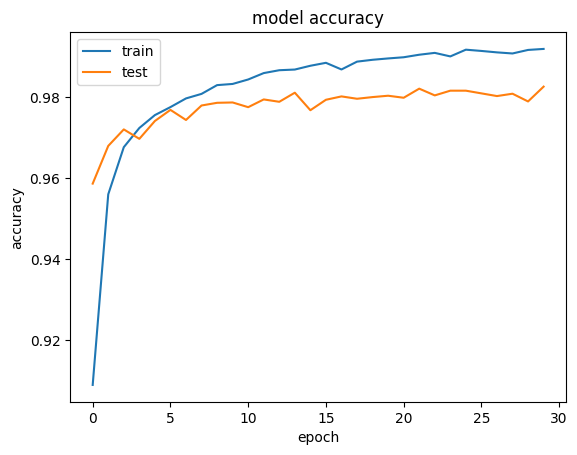

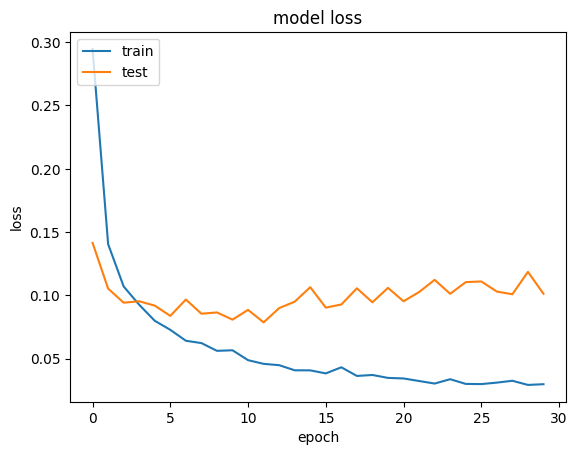

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [14]:
#evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0881 - accuracy: 0.9831
Test accuracy: 0.9830999970436096
